In [1]:
import os
import time 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
os.environ['TFHUB_DOWNLOAD_PROGRESS']='True'


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

--2021-07-07 09:00:34--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.001s  

2021-07-07 09:00:34 (28.9 MB/s) - ‘original.png’ saved [34146/34146]



In [ ]:
# setting the image and its path
IMAGE_PATH = 'images (2).jpg'
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

## Helper function to plot and process images

In [ ]:
# function to preprocess image so that it can be handled by model
def preprocess_image(image_path):
   '''Loads the image given make it ready for 
      the model
      Args:
        image_path: Path to the image file
   '''
   image = tf.image.decode_image(tf.io.read_file(image_path))
   if image.shape[-1] == 4:
     image = image[...,:-1]
   size = (tf.convert_to_tensor(image.shape[:-1]) // 4) * 4
   image = tf.image.crop_to_bounding_box(image, 0, 0, size[0], size[1])
   image = tf.cast(image,tf.float32)
   return tf.expand_dims(image,0)

def save_image(image,filename):
  ''' 
   Saves unscaled Tensor Images
   image: 3D image Tensor
   filename: Name of the file to be saved
  '''
  if not isinstance(image, Image.Image):
      image = tf.clip_by_value(image, 0, 255)
      image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save('%s.jpg' % filename)
  print('Saved as %s.jpg' % filename)

In [ ]:
preprocess_image(IMAGE_PATH)

<tf.Tensor: shape=(1, 176, 284, 3), dtype=float32, numpy=
array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[66., 66., 66.],
         [66., 66., 66.],
         [68., 68., 68.],
         ...,
         [74., 74., 74.],
         [71., 71., 71.],
         [69., 69., 69.]],

        [[68., 68., 68.],
         [69., 69., 69.],
         [71., 71., 71.],
         ...,
         [79., 79., 79.],
         [76., 76., 76.],
         [74., 74., 74.]],

        [[70., 70., 70.],
         [71., 71., 71.],
         [73., 7

Structural Similarity Index


In [10]:
from IPython.display import Image
Image(url= "https://nguyenkimth-my.sharepoint.com/:i:/g/personal/lp261_o-365_co/Eck8f5isNglNqADFwaGTKAcBk-h0bqNfXN_xrAOHlreD5w?e=hDmLze",)

In [ ]:
#%matplotlib inline
def plot_image(image,title=''):
  ''' 
  plots the Image tensors
  image: 3D image Tensor
  title: Title for plot
  '''
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis('off')
  plt.title(title)


## Perform super resolution

## load the model

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

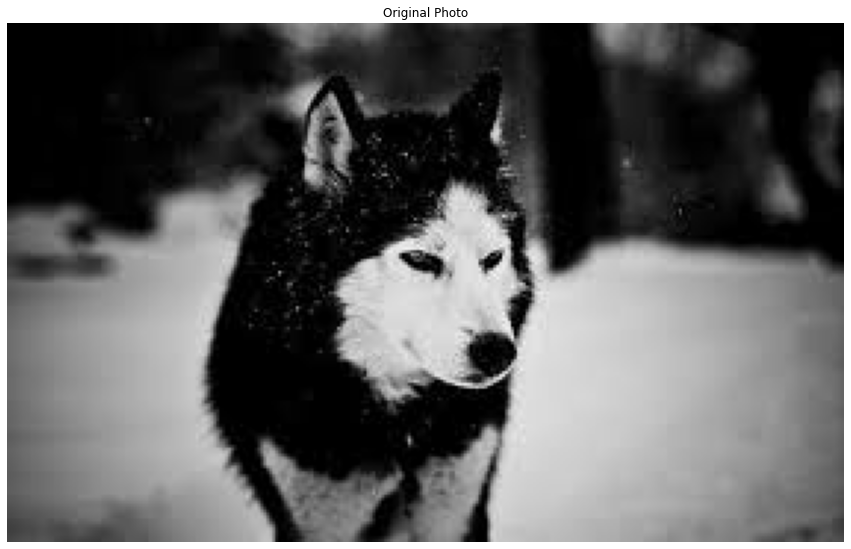

In [ ]:
load_image = preprocess_image(IMAGE_PATH)

# plot original image
plot_image(tf.squeeze(load_image),title='Original Photo')

In [ ]:
# Start Performing resolution 
start = time.time()
super_image = model(load_image)
super_image = tf.squeeze(super_image)
print('Time taken to complete process: %f'%(time.time() - start))

Time taken to complete process: 12.291446


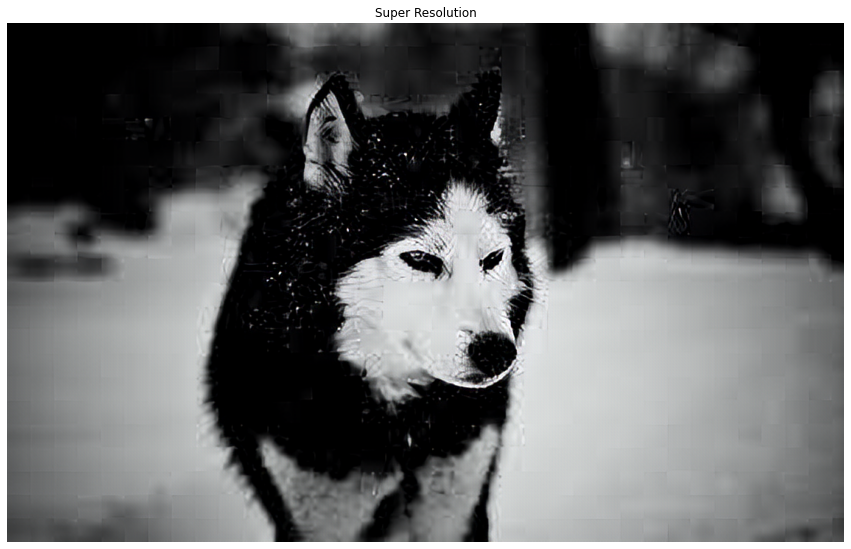

In [ ]:
#plot the output image 
plot_image(tf.squeeze(super_image),'Super Resolution')

## Evalutaion 

In [ ]:
!wget "https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64" -O test.jpg
IMAGE_PATH = "test.jpg"

--2021-07-07 10:16:37--  https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64
Resolving lh4.googleusercontent.com (lh4.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to lh4.googleusercontent.com (lh4.googleusercontent.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84897 (83K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  82.91K  --.-KB/s    in 0.001s  

2021-07-07 10:16:37 (106 MB/s) - ‘test.jpg’ saved [84897/84897]



In [ ]:
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(tf.cast(tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(Image.fromarray(image.numpy()).resize([image_size[0] // 4, image_size[1] // 4],Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [ ]:
hr_image = preprocess_image(IMAGE_PATH)

In [ ]:
lr_image = downscale_image(tf.squeeze(hr_image))

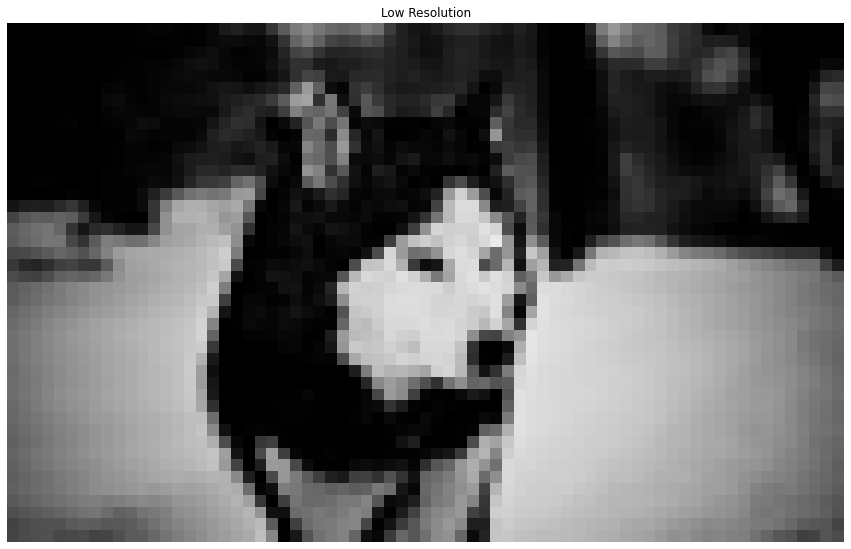

In [ ]:
# Plotting Low Resolution Image
plot_image(tf.squeeze(lr_image), title="Low Resolution")

In [ ]:
start = time.time()
fake_image = model(lr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 1.836289


PSNR Achieved: 29.136759


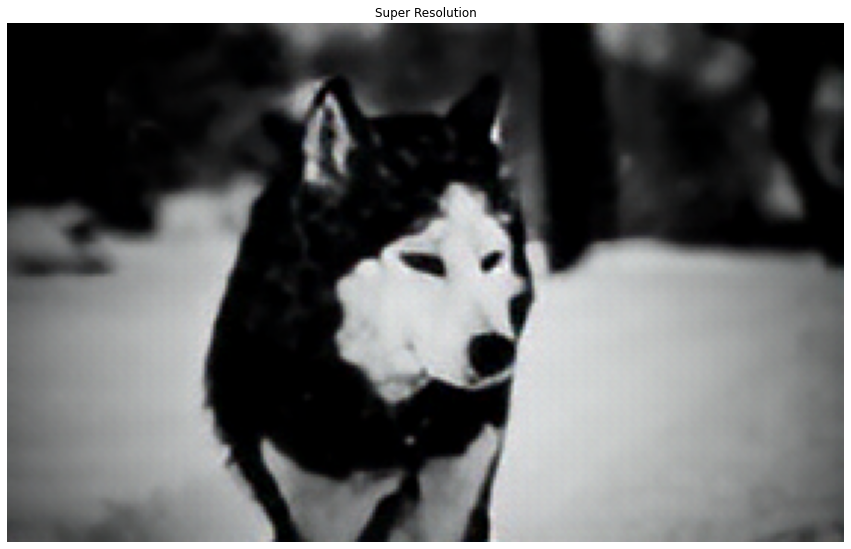

In [ ]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")
# Calculating PSNR wrt Original Image
psnr = tf.image.psnr(
    tf.clip_by_value(fake_image, 0, 255),
    tf.clip_by_value(hr_image, 0, 255), max_val=255)
print("PSNR Achieved: %f" % psnr)

PSNR: 29.136759


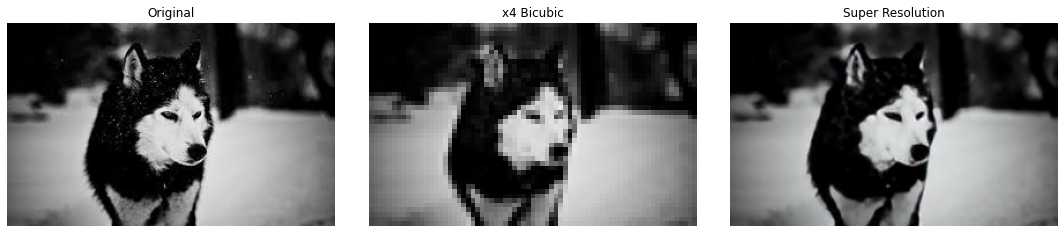

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, axes = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(131)
plot_image(tf.squeeze(hr_image), title="Original")
plt.subplot(132)
fig.tight_layout()
plot_image(tf.squeeze(lr_image), "x4 Bicubic")
plt.subplot(133)
fig.tight_layout()
plot_image(tf.squeeze(fake_image), "Super Resolution")
plt.savefig("ESRGAN_DIV2K.jpg", bbox_inches="tight")
print("PSNR: %f" % psnr)